In [1]:
import pytraj as pt

traj = pt.datafiles.load_tz2_ortho()

In [2]:
import nglview as nv
from pytraj import view

ntraj = view.to_nglview(traj)
ntraj

In [3]:
tv = nv.TrajectoryViewer(ntraj)
tv.rotate_speed = 7.
tv.representations = []
tv._add_representation('not hydrogen', type='ball+stick')
tv._add_representation('polymer', type='cartoon')

#tv

In [4]:
import sys

def link_mpl(ngl_widget, ax):
    sys.stdout('hello')
    """link ngl_widget to Axes

    Parameters
    ----------
    ngl_widget : nglview.TrajectoryViewer

    Examples
    --------
        import matplotlib.pyplot as plt
        from pytraj import view
        import pytraj as pt
        from nglview.matplotlib_link import link_mpl
        import nglview

        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111)
        ax.set_xlabel('frame number')
        ax.set_ylabel('End to end distance (Angstrom)')
        traj = pt.datafiles.load_tz2()
        data = pt.radgyr(traj, '@CA')
        ax.plot(data)

        # convert pytraj's Trajectory to nglview.Trajectory

        ntraj = pt.view.to_nglview(traj)
        tv = nglview.TrajectoryViewer(ntraj)
        link_mpl(tv, ax)
    """
    # adapted from Arose's code

    # TODO: not work yet, why?
    x_data, y_data = ax.get_lines()[0].get_data()
    print(x_data, y_data)

    lineh = ax.axhline(ax.get_ybound()[0])
    linev = ax.axvline(ax.get_xbound()[0])
    dot, = ax.plot([], [], 'o', c='red', ms=10)

    ngl_widget.isClick = False

    def onclick(event):
        linev.set_xdata((event.xdata, event.xdata))
        lineh.set_ydata((event.ydata, event.ydata))
        ngl_widget.isClick = True
        ngl_widget.frame = index

    def frame_changed(self):
        nglview.TrajectoryViewer._frame_changed(ngl_widget)
        if ngl_widget.isClick is True:
            ngl_widget.isClick = False
        else:
            dot.set_xdata((x_data[ngl_widget.frame]))
            dot.set_ydata((y_data[ngl_widget.frame]))
            linev.set_xdata(ax.get_ybound()[0])
            lineh.set_ydata(ax.get_xbound()[0])
    print(ngl_widget)
    ngl_widget._frame_changed = frame_changed

    axes_widget = AxesWidget(ax)
    axes_widget.connect_event('button_release_event', onclick)


/home/haichit/anaconda3/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


<IPython.core.display.Javascript object>


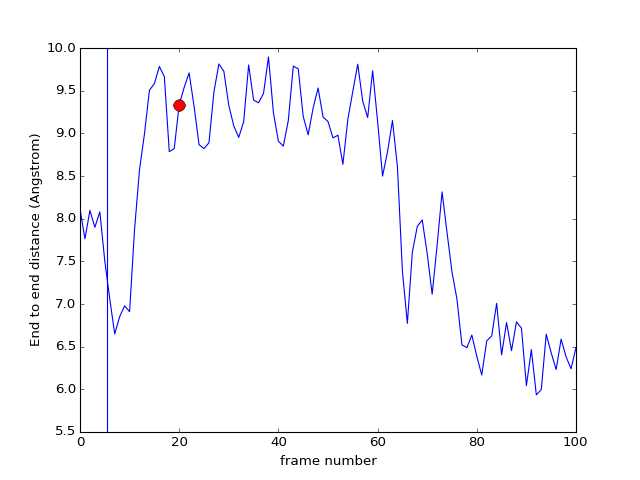

In [5]:
%matplotlib notebook

import matplotlib.pyplot as plt
from pytraj import view
import pytraj as pt
from nglview.matplotlib_link import link_mpl
import nglview

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('frame number')
ax.set_ylabel('End to end distance (Angstrom)')
traj = pt.datafiles.load_tz2()
data = pt.radgyr(traj, '@CA')
ax.plot(data)

# convert pytraj's Trajectory to nglview.Trajectory

ntraj = pt.view.to_nglview(traj)
tv = nglview.TrajectoryViewer(ntraj)
link_mpl(tv, ax)

In [6]:
tv

In [23]:
tv.representations = []
tv._add_representation('*', type='line')
tv._add_representation('*', type='ball+stick')
tv._add_representation('*', type='cartoon')
# selection = 'resname ASN'
selection = 'sidechain'
tv._add_representation(selection, type='ball+stick', color='residueindex')
tv.representations

[{'params': {'sele': '*'}, 'type': 'line'},
 {'params': {'sele': '*'}, 'type': 'ball+stick'},
 {'params': {'sele': '*'}, 'type': 'cartoon'},
 {'params': {'color': 'residueindex', 'sele': 'sidechain'},
  'type': 'ball+stick'}]